# Install Packages
Several uncommon packages installed here

In [2]:
%pip install pygbif
%pip install mapbox_vector_tile
%pip install geopandas
%pip install geopandas matplotlib rasterio


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Info for download
Username and email for downloading the data used in this. Password not included (obviously)

In [6]:
GBIF_PWD = 'TemporaryPasswordForDownload'
GBIF_USER = "bjancso-szabo"
GBIF_EMAIL = 'basil.jancso-szabo@mail.mcgill.ca'

# Download Files

Initiate the download of the data for 16 species. Note that currently Ursus Horribilis is not being found. Maps downloaded from Natural Earth, specifically https://www.naturalearthdata.com/downloads/10m-natural-earth-1/10m-natural-earth-1-with-shaded-relief-and-water/

In [4]:
from pygbif import species as species
from pygbif import occurrences as occ

In [ ]:
species_list = ["Ursus arctos horribilis", "Ursus americanus","Canis lupus", "Canis latrans", "Vulpes vulpes", "Puma concolor", 
"Lynx canadensis", "Gulo gulo", "Cervus canadensis", "Odocoileus virginianus", 
"Odocoileus hemionus","Alces americanus", "Ovis canadensis", "Oreamnos americanus", 
"Rangifer tarandus", "Lepus americanus"]
keys = [ species.name_backbone(x)['usageKey'] for x in species_list ]
print(keys)

#sorted(x.items(), key=lambda z:z[1], reverse=True)



[6163845, 2433407, 5219173, 5219153, 5219243, 2435099, 2435263, 5219073, 8600904, 2440965, 2440974, 4262283, 2441119, 2441151, 5220114, 2436794]


In [11]:
query = { "type": "and",
  "predicates": [
    {  "type": "in",
        "key": "TAXON_KEY",
        "values": keys},
    {
      "type": "within",
      "geometry": "POLYGON((-114.0805721 50.0437601, -115.0408459 51.8777362, -117.7137423 54.0301079, -119.9779773 53.5716259, -116.0885596 50.0815029, -114.0805721 50.0437601))"
    },
    {
      "type": "equals",
      "key": "DATASET_KEY",
      "value": "50c9509d-22c7-4a22-a47d-8c48425ef4a7"
    }
     ]}

occ.download(query, user=GBIF_USER,email=GBIF_EMAIL,pwd=GBIF_PWD)



INFO:Your download key is 0031522-241107131044228


('0031522-241107131044228',
 {'creator': 'bjancso-szabo',
  'notification_address': ['basil.jancso-szabo@mail.mcgill.ca'],
  'sendNotification': True,
  'predicate': {'type': 'and',
   'predicates': [{'type': 'in',
     'key': 'TAXON_KEY',
     'values': [6163845,
      2433407,
      5219173,
      5219153,
      5219243,
      2435099,
      2435263,
      5219073,
      8600904,
      2440965,
      2440974,
      4262283,
      2441119,
      2441151,
      5220114,
      2436794]},
    {'type': 'within',
     'geometry': 'POLYGON((-114.0805721 50.0437601, -115.0408459 51.8777362, -117.7137423 54.0301079, -119.9779773 53.5716259, -116.0885596 50.0815029, -114.0805721 50.0437601))'},
    {'type': 'equals',
     'key': 'DATASET_KEY',
     'value': '50c9509d-22c7-4a22-a47d-8c48425ef4a7'}]},
  'format': 'SIMPLE_CSV'})

# Data Exploration

Number of rows of df: 7492


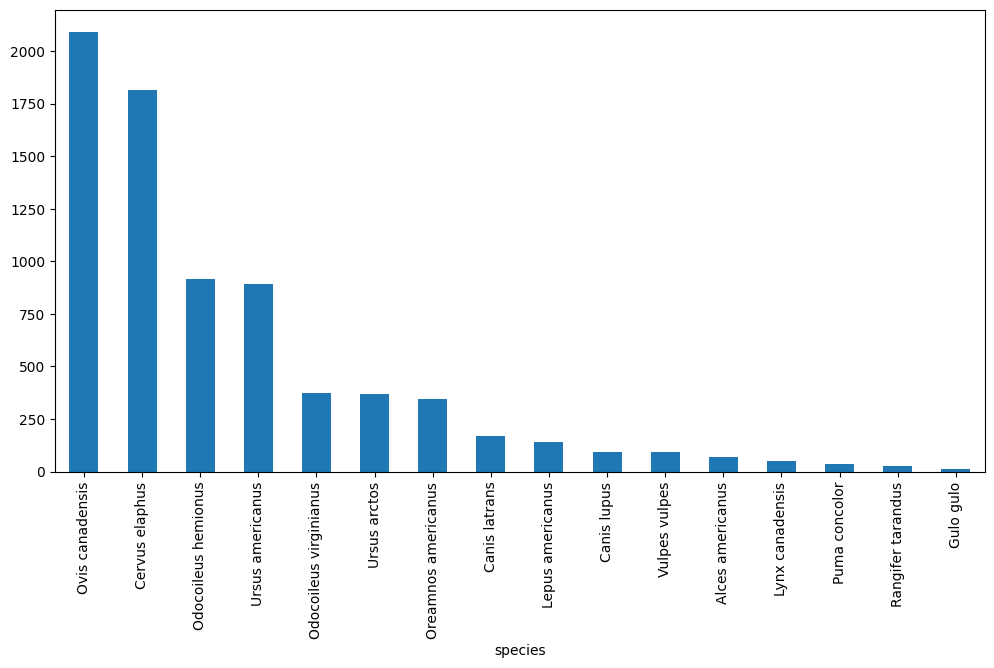

Number of different species: 16
Species in species_list but not in the data: {'Ursus arctos horribilis', 'Cervus\xa0canadensis', 'Alces\xa0americanus'}


In [15]:
# Convert to a pandas dataframe
import pandas as pd
# Read the csv file into a pandas dataframe


df = pd.read_csv("Nov24Download.csv",
    delimiter='\t',  # Specify the delimiter if it's not a comma
    na_values=['', 'NA', 'null'],  # Specify additional strings to recognize as NA/NaN
    on_bad_lines='skip'  # Skip lines with too many fields
)

df.head()
print("Number of rows of df:", len(df))
import matplotlib.pyplot as plt

# Plot the number of occurrences of each species, including zero counts
plt.figure(figsize=(12, 6))
df['species'].value_counts().plot(kind='bar')
plt.show()

# Print the number of different species
print("Number of different species:", len(df['species'].unique()))

# See what species are present in species_list but not in the data
print("Species in species_list but not in the data:", set(species_list) - set(df['species'].unique()))


/var/folders/0z/p40hcj_16lxbtp07dg2s4ymh0000gq/T/ipykernel_88080/3311377526.py:50: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf['species'] == species].plot(ax=ax, color=color, markersize=5, label=species)


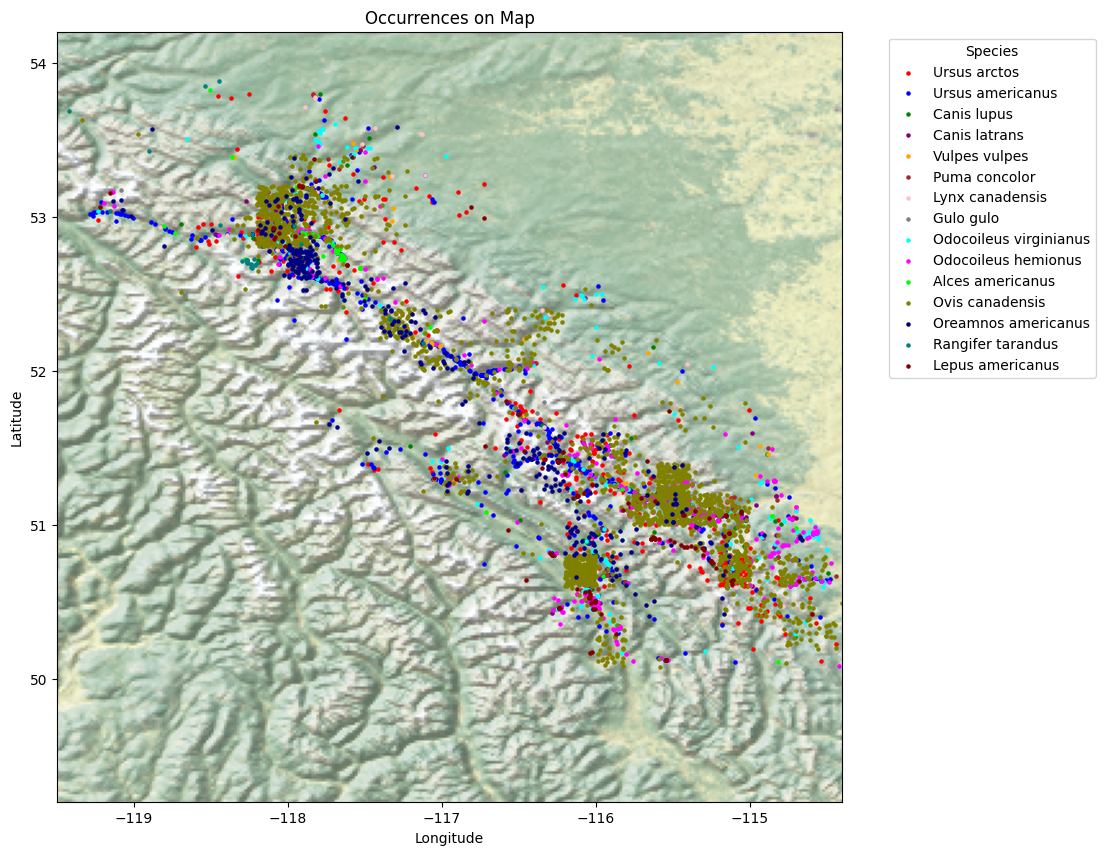

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from shapely.geometry import Point


# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']))

# Load the .tif file
tif_path = 'NE1_HR_LC_SR_W.tif'
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(15, 10))
    # Define the bounding box for the region of interest
    min_lon, min_lat, max_lon, max_lat = -119.5, 49.2, -114.4, 54.2

    # Calculate the center of the bounding box
    center_lon = (min_lon + max_lon) / 2
    center_lat = (min_lat + max_lat) / 2

    # Set the extent of the map to the bounding box
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)

    show(src, ax=ax)

    # Plot the points
    species_colors = {
        "Ursus arctos": "red",
        "Ursus americanus": "blue",
        "Canis lupus": "green",
        "Canis latrans": "purple",
        "Vulpes vulpes": "orange",
        "Puma concolor": "brown",
        "Lynx canadensis": "pink",
        "Gulo gulo": "gray",
        "Cervus elaphus": "yellow",
        "Odocoileus virginianus": "cyan",
        "Odocoileus hemionus": "magenta",
        "Alces americanus": "lime",
        "Ovis canadensis": "olive",
        "Oreamnos americanus": "navy",
        "Rangifer tarandus": "teal",
        "Lepus americanus": "maroon"
    }

    for species, color in species_colors.items():
        gdf[gdf['species'] == species].plot(ax=ax, color=color, markersize=5, label=species)

    plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Occurrences on Map')
    plt.show()